In [ ]:
# Including OpenCV and Library
import cv2
import random
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Initialising the width and height of the original image and the watermark
IMG_WIDTH = 1200
IMG_HEIGHT = 800
WATERMARK_WIDTH = 256
WATERMARK_HEIGHT = 256

In [ ]:
# Total size of the original image and the watermark
IMG_SIZE = IMG_HEIGHT * IMG_WIDTH
WATERMARK_SIZE = WATERMARK_HEIGHT * WATERMARK_WIDTH

In [ ]:
# Key and the thresh
KEY = 1001
THRESH = 75

In [ ]:
# Assigning XOR of x and y as true and false for value of true equals 255 and false equals 0
def xor(x ,y):
    if x == 0 and y == 0:
        return 0
    elif x == 0 and y != 0:
        return 255
    elif x != 0 and y == 0:
        return 255
    elif x !=0 and y != 0:
        return 0

In [ ]:
# Calculating the mean value of a particular and all its possible (at max 8) neighbors
def mean_neighbour(img, x, y):
    val = 0
    num = 0
    i = x
    j = y
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x + 1
    j = y + 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x - 1
    j = y - 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x + 1
    j = y
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x
    j = y + 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x + 1
    j = y - 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x - 1
    j = y + 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x - 1
    j = y
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x
    j = y - 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    
    return val/float(num)

In [ ]:
og_img = cv2.imread('original_image.jpg',0)
print(og_img)
watermark_img = cv2.imread('watermark.jpg', 0)
print(watermark_img)
ret,watermark_img = cv2.threshold(watermark_img,127,255,cv2.THRESH_BINARY)

[[150 154 137 ... 153 153 154]
 [161 169 143 ... 155 155 155]
 [148 145 141 ... 155 155 155]
 ...
 [175 172 172 ...  82  83  83]
 [173 176 175 ...  83  83  83]
 [174 174 174 ...  85  84  84]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
master_img = np.zeros((WATERMARK_WIDTH, WATERMARK_HEIGHT, 1), np.uint8)
owner_img = np.zeros((WATERMARK_WIDTH, WATERMARK_HEIGHT, 1), np.uint8)

In [ ]:
# Taking random points out of the total sample
random.seed(a=KEY)
random_points = random.sample(range(IMG_SIZE), WATERMARK_SIZE)

In [ ]:
i = 0
j = 0

for k in random_points:
    x = k // IMG_WIDTH
    y = k % IMG_WIDTH
    if mean_neighbour(og_img, x, y) > THRESH:
        master_img[i,j] = 255
    j += 1
    if j == 256:
        j = 0
        i += 1

In [ ]:
for i in range(0, WATERMARK_HEIGHT):
    for j in range(0, WATERMARK_WIDTH):
        owner_img[i, j] = xor(master_img[i, j], watermark_img[i, j])

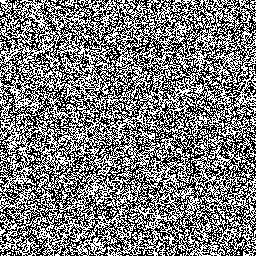

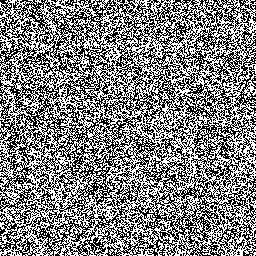

In [ ]:
cv2_imshow(master_img)
cv2_imshow(owner_img)
cv2.imwrite('master_img.jpg', master_img)
cv2.imwrite('owner_img.jpg', owner_img)
cv2.waitKey(0)
cv2.destroyAllWindows()